### This notebook is to fix the dataset into one csv that is more functional

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('../../data/shp/0001_capsule.csv')

In [7]:
df

,x,y,label
0,102.172567,87.946284,1
1,101.534607,86.660456,1
2,100.896646,85.374628,1
3,100.258686,84.088800,1
4,99.620726,82.802971,1
...,...,...,...
131,103.934485,93.428508,0
132,103.649232,92.012304,0
133,103.258944,90.621377,0
134,102.765803,89.263506,0


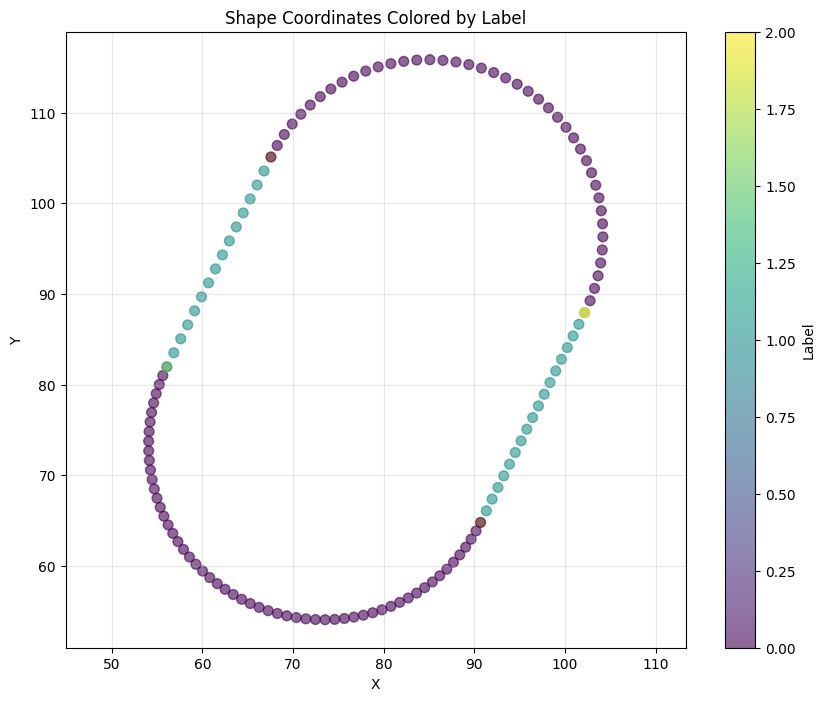

Unique labels and their counts:
label
0    99
1    33
2     4
Name: count, dtype: int64


In [10]:
# Create a scatter plot with points colored by label
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['x'], df['y'], c=df['label'], cmap='viridis', s=50, alpha=0.6)
plt.colorbar(scatter, label='Label')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Shape Coordinates Colored by Label')
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

# Print unique labels and their counts
print("Unique labels and their counts:")
print(df['label'].value_counts().sort_index())

Conclusion:

- 0 curved region
- 1 straight region
- 2 boundary (change)

In [11]:
# Combined csv
from pathlib import Path

path = Path("../../data/shp/")

# Get all CSV files in the directory
csv_files = sorted(path.glob("*.csv"))

print(f"Found {len(csv_files)} CSV files:")
for csv_file in csv_files[:10]:  # Print first 10 as example
    print(f"  {csv_file.name}")

# If you want to process each file
all_dfs = []
for csv_file in csv_files:
    # Extract shape name from filename (e.g., "0001_capsule" from "0001_capsule.csv")
    shape_name = csv_file.stem.split('_', 1)[1]  # Gets the part after the number
    
    # Read the CSV
    df_temp = pd.read_csv(csv_file)

    # Add a column for the shape type
    df_temp['shape'] = shape_name
    
    df_temp['shape_id'] = csv_file.name.split('_')[0]

    all_dfs.append(df_temp)
    
    print(f"Loaded {csv_file.name} -> shape: {shape_name}")

# Combine all dataframes
combined_df = pd.concat(all_dfs, ignore_index=True)
print(f"\nCombined dataset shape: {combined_df.shape}")
print(f"Shape types: {combined_df['shape'].unique()}")

Found 10000 CSV files:
  0001_capsule.csv
  0002_triangle_rounded.csv
  0003_circle.csv
  0004_parallelogram_simple.csv
  0005_semicircle.csv
  0006_triangle_rounded.csv
  0007_square_rounded.csv
  0008_square_simple.csv
  0009_semicircle.csv
  0010_capsule.csv
Loaded 0001_capsule.csv -> shape: capsule
Loaded 0002_triangle_rounded.csv -> shape: triangle_rounded
Loaded 0003_circle.csv -> shape: circle
Loaded 0004_parallelogram_simple.csv -> shape: parallelogram_simple
Loaded 0005_semicircle.csv -> shape: semicircle
Loaded 0006_triangle_rounded.csv -> shape: triangle_rounded
Loaded 0007_square_rounded.csv -> shape: square_rounded
Loaded 0008_square_simple.csv -> shape: square_simple
Loaded 0009_semicircle.csv -> shape: semicircle
Loaded 0010_capsule.csv -> shape: capsule
Loaded 0011_triangle_rounded.csv -> shape: triangle_rounded
Loaded 0012_parallelogram_rounded.csv -> shape: parallelogram_rounded
Loaded 0013_square_simple.csv -> shape: square_simple
Loaded 0014_parallelogram_simple.csv

In [18]:
combined_df

,x,y,label,shape,shape_id
0,102.172567,87.946284,1,capsule,0001
1,101.534607,86.660456,1,capsule,0001
2,100.896646,85.374628,1,capsule,0001
3,100.258686,84.088800,1,capsule,0001
4,99.620726,82.802971,1,capsule,0001
...,...,...,...,...,...
1209899,69.560066,57.103171,0,capsule,9999
1209900,69.369995,57.668560,0,capsule,9999
1209901,69.213120,58.244044,0,capsule,9999
1209902,69.089972,58.827677,0,capsule,9999


In [19]:
combined_df.dtypes

x           float64
y           float64
label         int64
shape        object
shape_id     object
dtype: object

In [21]:
combined_df[combined_df['shape_id']=='10000']

,x,y,label,shape,shape_id
120691,100.934724,52.458571,1,rectangle_simple,10000
120692,102.657501,54.184923,1,rectangle_simple,10000
120693,104.380277,55.911276,1,rectangle_simple,10000
120694,106.103054,57.637628,1,rectangle_simple,10000
120695,107.825830,59.363980,1,rectangle_simple,10000
...,...,...,...,...,...
120848,94.248358,59.131087,1,rectangle_simple,10000
120849,95.919950,57.462958,1,rectangle_simple,10000
120850,97.591541,55.794829,1,rectangle_simple,10000
120851,99.263133,54.126700,1,rectangle_simple,10000


In [23]:
combined_df.to_csv('../../data/combined_data.csv')